## Step 1: Import Required Libraries & Generate Sample Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a Dataset
np.random.seed(42)
date_range = pd.date_range(start="2015-01-01", end="2024-12-31", freq="ME")
trend = np.linspace(200, 1000, len(date_range))
seasonality = 100 * np.sin(2 * np.pi * (date_range.month / 12))
noise = np.random.normal(0, 50, len(date_range))
sales = trend + seasonality + noise

data = pd.DataFrame({"Date": date_range, "Sales": sales})
data.set_index("Date", inplace=True)

## Step 2: Decompose the Time Series

In [8]:
# Perform Decomposition
decomposition = seasonal_decompose(data["Sales"], model="additive", period=12)
trend_component = decomposition.trend
seasonal_component = decomposition.seasonal
residual_component = decomposition.resid

## Step 3: Visualize the Components

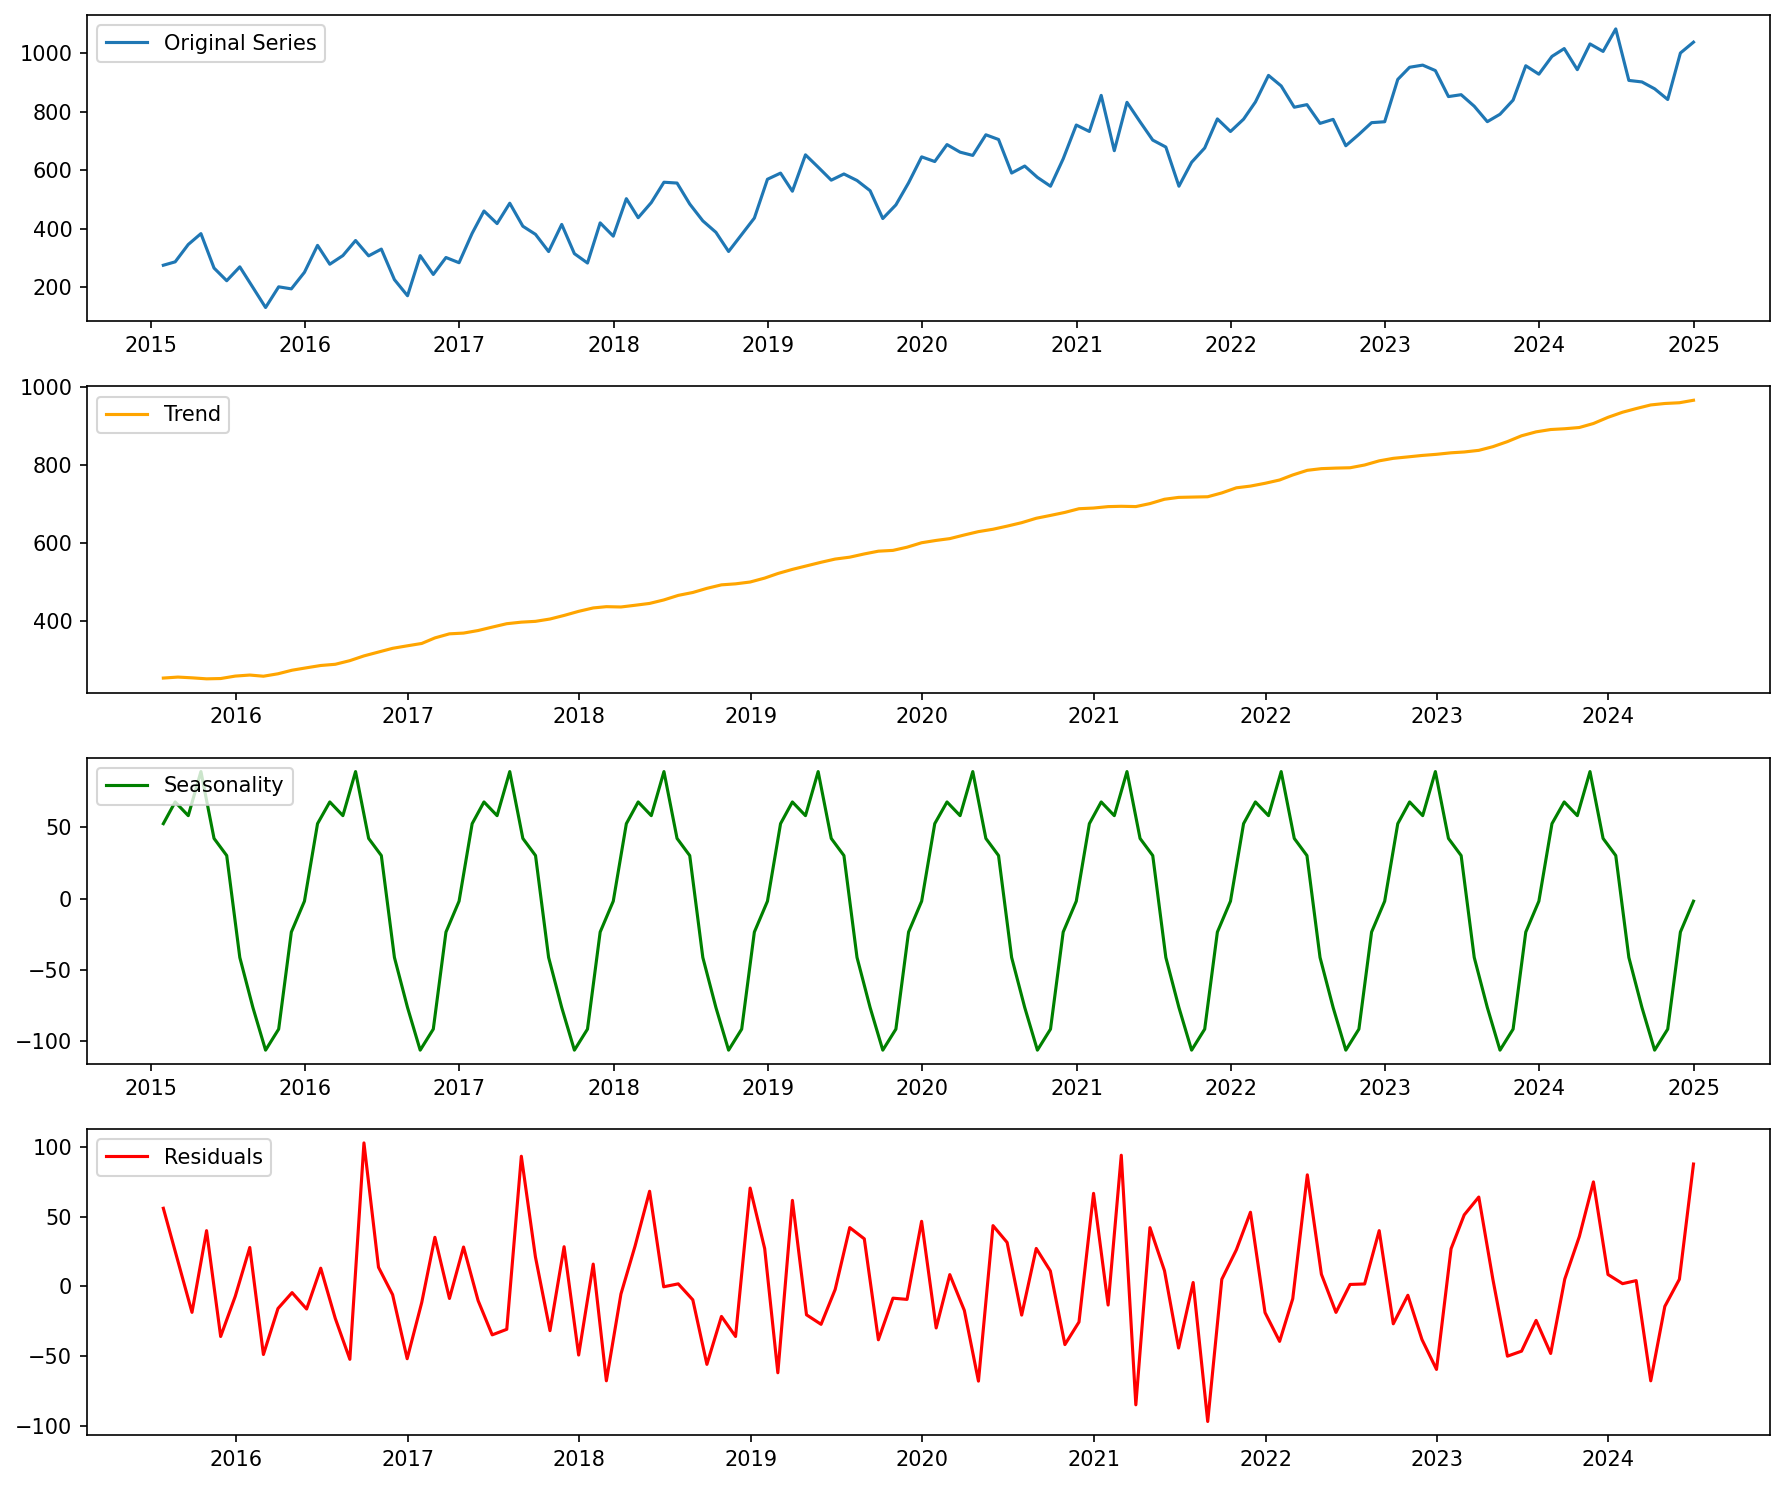

In [9]:
# Plot the decomposition
plt.figure(figsize=(12, 10),dpi=150)

# Original series
plt.subplot(411)
plt.plot(data["Sales"], label="Original Series")
plt.legend(loc="upper left")

# Trend
plt.subplot(412)
plt.plot(trend_component, label="Trend", color="orange")
plt.legend(loc="upper left")

# Seasonality
plt.subplot(413)
plt.plot(seasonal_component, label="Seasonality", color="green")
plt.legend(loc="upper left")

# Residuals
plt.subplot(414)
plt.plot(residual_component, label="Residuals", color="red")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()